In [280]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
!pip install -q pyyaml h5py  # Required to save models in HDF5 format
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [281]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing;
import math, time, itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os
from sklearn import linear_model;
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas_datareader import data
import urllib.request, json
import tensorflow as tf 
import io
import pdb
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
# Company_select='GOOG'
Company_select='FORD MOTOR CO'
ticker_symbol='F'

In [366]:
df1 = pd.read_csv('drive/MyDrive/F.csv') #For ford
#df1 = pd.read_csv('drive/MyDrive/AMZN.csv') #For amazon
#Df1_comp = df1[3500:]
Df1_comp = df1

In [367]:
Df1_comp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-06-01,0.000000,2.173495,2.149165,2.153220,0.276017,1091238
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,0.275497,1174468
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,0.275497,5209582
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,0.272378,1424158
4,1972-06-07,2.124835,2.137000,2.112670,2.112670,0.270819,675088


In [368]:
Df1_comp.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
12483,2021-11-30,19.620001,19.950001,19.030001,19.190001,19.190001,103238400
12484,2021-12-01,19.629999,20.469999,19.530001,19.580000,19.580000,125295600
12485,2021-12-02,19.500000,20.110001,19.280001,19.870001,19.870001,94142300
12486,2021-12-03,20.370001,20.400000,18.930000,19.139999,19.139999,120139100
12487,2021-12-06,19.230000,19.490000,18.610001,19.219999,19.219999,88067000


In [369]:
Df1_comp=Df1_comp.rename(columns={"Data Date - Dividends": "Date","Trading Volume - Daily": "Volume","Price - Close - Daily": "Close","Price - High - Daily": "High","Price - Low - Daily": "Low","Price - Open - Daily": "Open","Current EPS": "Current_EPS"})
date_val=[]
del Df1_comp["Adj Close"]
Df1_comp['Mid']=(Df1_comp['High']+Df1_comp['Low'])/2
Df1_comp['Date'] = pd.to_datetime(Df1_comp.Date)
Df1_comp.sort_values(by='Date',inplace=True)
Df1_comp.head()

,Date,Open,High,Low,Close,Volume,Mid
0,1972-06-01,0.000000,2.173495,2.149165,2.153220,1091238,2.161330
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,1174468,2.157275
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,5209582,2.155247
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,1424158,2.137000
4,1972-06-07,2.124835,2.137000,2.112670,2.112670,675088,2.124835


In [370]:
cols = Df1_comp.columns.tolist()
cols

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Mid']

In [287]:
#cols = ['Date', 'Volume', 'Close', 'High', 'Low', 'Open', 'Mid']

In [371]:
Df1_comp = Df1_comp[cols]
Df1_comp.head()

,Date,Open,High,Low,Close,Volume,Mid
0,1972-06-01,0.000000,2.173495,2.149165,2.153220,1091238,2.161330
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,1174468,2.157275
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,5209582,2.155247
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,1424158,2.137000
4,1972-06-07,2.124835,2.137000,2.112670,2.112670,675088,2.124835


In [338]:
#Df1_comp.drop(Df1_comp.index[0:8138], inplace=True) # for FORD

In [372]:
Df1_comp

,Date,Open,High,Low,Close,Volume,Mid
0,1972-06-01,0.000000,2.173495,2.149165,2.153220,1091238,2.161330
1,1972-06-02,2.153220,2.173495,2.141055,2.149165,1174468,2.157275
2,1972-06-05,2.149165,2.169440,2.141055,2.149165,5209582,2.155247
3,1972-06-06,2.149165,2.157275,2.116725,2.124835,1424158,2.137000
4,1972-06-07,2.124835,2.137000,2.112670,2.112670,675088,2.124835
...,...,...,...,...,...,...,...
12483,2021-11-30,19.620001,19.950001,19.030001,19.190001,103238400,19.490001
12484,2021-12-01,19.629999,20.469999,19.530001,19.580000,125295600,20.000000
12485,2021-12-02,19.500000,20.110001,19.280001,19.870001,94142300,19.695001
12486,2021-12-03,20.370001,20.400000,18.930000,19.139999,120139100,19.665000


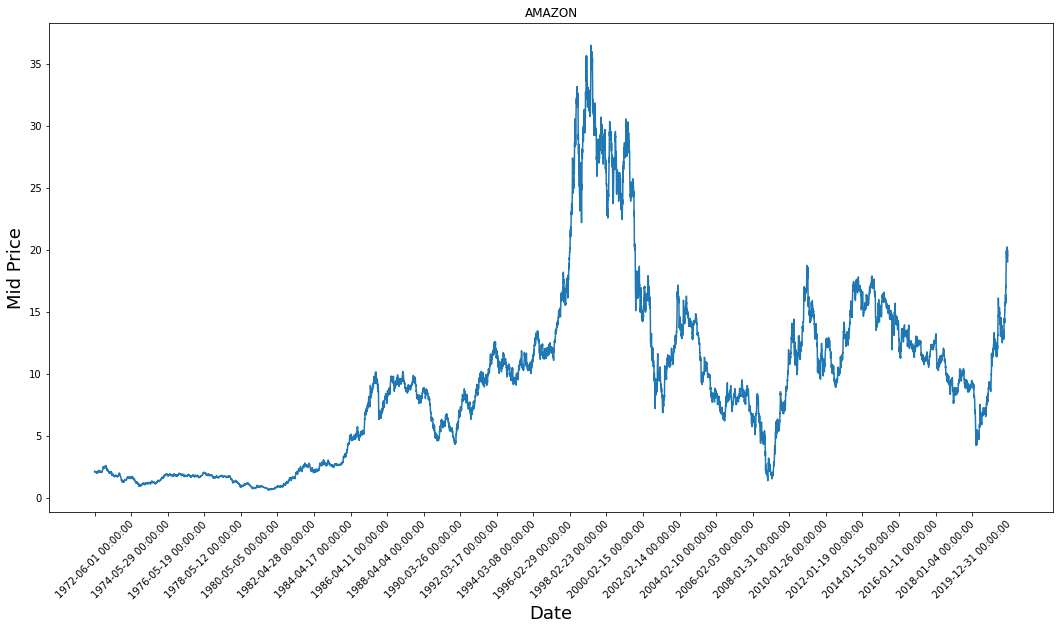

In [373]:
n = Df1_comp.shape[0]
p = Df1_comp.shape[1]
plt.figure(figsize = (18,9))
plt.plot(range(Df1_comp.shape[0]),Df1_comp['Mid'])
plt.xticks(range(0,Df1_comp.shape[0],500),Df1_comp['Date'].loc[::500],rotation=45)

plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.title("AMAZON")
plt.show()

In [309]:
Df1_comp['Moving_av']= Df1_comp['Adj Close'].rolling(window=50,min_periods=0).mean()

In [310]:
Df1_comp

,Date,Open,High,Low,Close,Adj Close,Volume,Mid,Moving_av
3500,2011-04-12,183.059998,184.589996,179.419998,180.479996,180.479996,5334500,182.004997,180.479996
3501,2011-04-13,180.830002,182.880005,179.800003,182.289993,182.289993,4216300,181.340004,181.384995
3502,2011-04-14,181.389999,182.080002,179.360001,181.820007,181.820007,3588200,180.720002,181.529999
3503,2011-04-15,181.000000,181.779999,179.020004,180.009995,180.009995,4272400,180.400002,181.149998
3504,2011-04-18,178.380005,178.910004,175.369995,178.339996,178.339996,4616500,177.139999,180.587997
...,...,...,...,...,...,...,...,...,...
6189,2021-12-16,3467.370117,3483.320068,3363.209961,3377.419922,3377.419922,3043800,3423.265014,3444.430420
6190,2021-12-17,3354.209961,3417.969971,3312.270020,3400.350098,3400.350098,4277100,3365.119996,3446.388823
6191,2021-12-20,3337.000000,3357.489990,3312.000000,3341.580078,3341.580078,2868600,3334.744995,3447.448022
6192,2021-12-21,3357.010010,3414.330078,3312.949951,3408.340088,3408.340088,2797800,3363.640014,3450.688823


In [311]:
i=1
rate_increase_in_vol=[0]
rate_increase_in_adj_close=[0]
while i<len(Df1_comp):
    rate_increase_in_vol.append(Df1_comp.iloc[i]['Volume']-Df1_comp.iloc[i-1]['Volume'])
    rate_increase_in_adj_close.append(Df1_comp.iloc[i]['Adj Close']-Df1_comp.iloc[i-1]['Adj Close'])
    i+=1
    
Df1_comp['Increase_in_vol']=rate_increase_in_vol
Df1_comp['Increase_in_adj_close']=rate_increase_in_adj_close

In [312]:
Df1_comp

,Date,Open,High,Low,Close,Adj Close,Volume,Mid,Moving_av,Increase_in_vol,Increase_in_adj_close
3500,2011-04-12,183.059998,184.589996,179.419998,180.479996,180.479996,5334500,182.004997,180.479996,0,0.000000
3501,2011-04-13,180.830002,182.880005,179.800003,182.289993,182.289993,4216300,181.340004,181.384995,-1118200,1.809997
3502,2011-04-14,181.389999,182.080002,179.360001,181.820007,181.820007,3588200,180.720002,181.529999,-628100,-0.469986
3503,2011-04-15,181.000000,181.779999,179.020004,180.009995,180.009995,4272400,180.400002,181.149998,684200,-1.810012
3504,2011-04-18,178.380005,178.910004,175.369995,178.339996,178.339996,4616500,177.139999,180.587997,344100,-1.669999
...,...,...,...,...,...,...,...,...,...,...,...
6189,2021-12-16,3467.370117,3483.320068,3363.209961,3377.419922,3377.419922,3043800,3423.265014,3444.430420,-745900,-88.880127
6190,2021-12-17,3354.209961,3417.969971,3312.270020,3400.350098,3400.350098,4277100,3365.119996,3446.388823,1233300,22.930176
6191,2021-12-20,3337.000000,3357.489990,3312.000000,3341.580078,3341.580078,2868600,3334.744995,3447.448022,-1408500,-58.770020
6192,2021-12-21,3357.010010,3414.330078,3312.949951,3408.340088,3408.340088,2797800,3363.640014,3450.688823,-70800,66.760010


# **STEP 1**

In [374]:
def prepare_data(df,forecast_col,forecast_out,test_size):
   
    label = df[forecast_col].shift(-forecast_out);
    X = np.array(df[[forecast_col]]); 
    X = preprocessing.scale(X) 
    X_lately = X[-forecast_out:] 
    X = X[:-forecast_out] 
    label.dropna(inplace=True); 
    y = np.array(label) 
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=test_size) #cross validation 

    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;

1.7378603250574185
The test score is:  0.9646288129976078


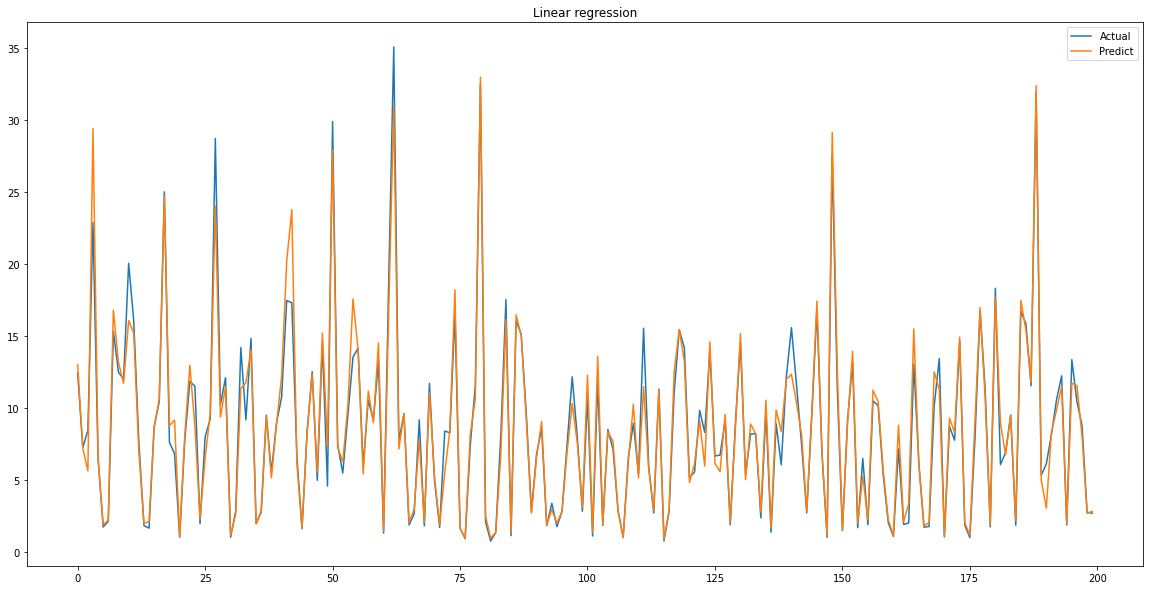

In [375]:
from sklearn.metrics import mean_squared_error
forecast_col = 'Mid'
forecast_out = 30
test_size = 0.2; 

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(Df1_comp,forecast_col,forecast_out,test_size); 

learner = linear_model.LinearRegression(); 

learner.fit(X_train,Y_train);
score=learner.score(X_test,Y_test);
predicted = learner.predict(X_test)
print(mean_squared_error(Y_test,predicted))
forecast= learner.predict(X_lately); 

response={};
response['test_score']=score; 
response['forecast_set']=forecast;
print("The test score is: ",format(score))

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(Y_test[:200],label='Actual')
ax.plot(predicted[:200],label='Predict')
plt.title('Linear regression')
ax.legend()


Score: 0.9664497026405524
Mean Squared Error (MSE): 1.6483962121745983


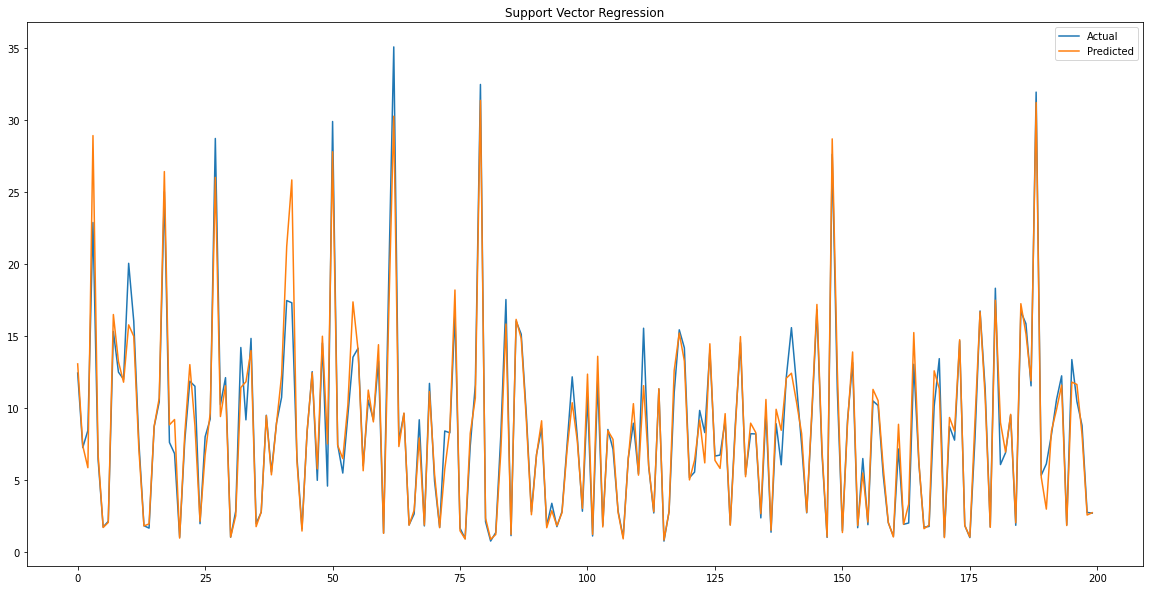

In [376]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,Y_train)
y_pred = regressor.predict(X_test)
score=regressor.score(X_test,Y_test)
print("Score:", score)
from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE):",mean_squared_error(Y_test, y_pred))
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(Y_test[:200], label='Actual')
ax.plot(y_pred[:200], label='Predicted')
plt.title('Support Vector Regression')
ax.legend()

Score: 0.9655933322771874
MSE: 1.6904714775013334


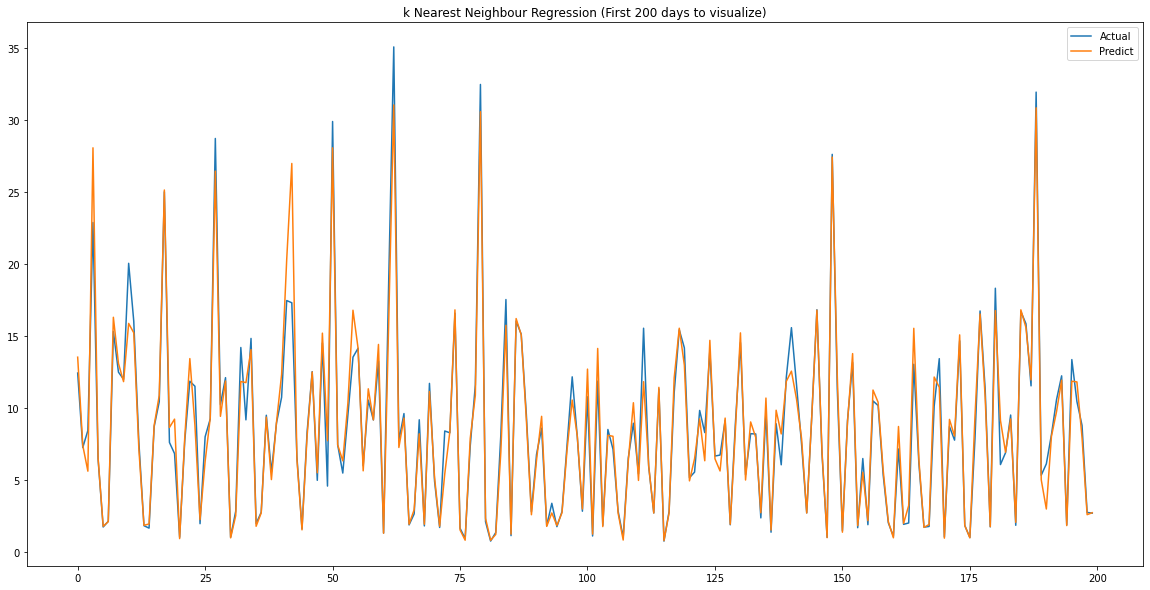

In [377]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 80)
model.fit(X_train, Y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
score=model.score(X_test,Y_test)
print("Score:", score)
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(Y_test, pred))
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(Y_test[:200],label='Actual')
ax.plot(pred[:200],label='Predict')
plt.title('k Nearest Neighbour Regression (First 200 days to visualize)')
ax.legend()

Score: 0.9656751843941473
MSE: 1.6864499119661642


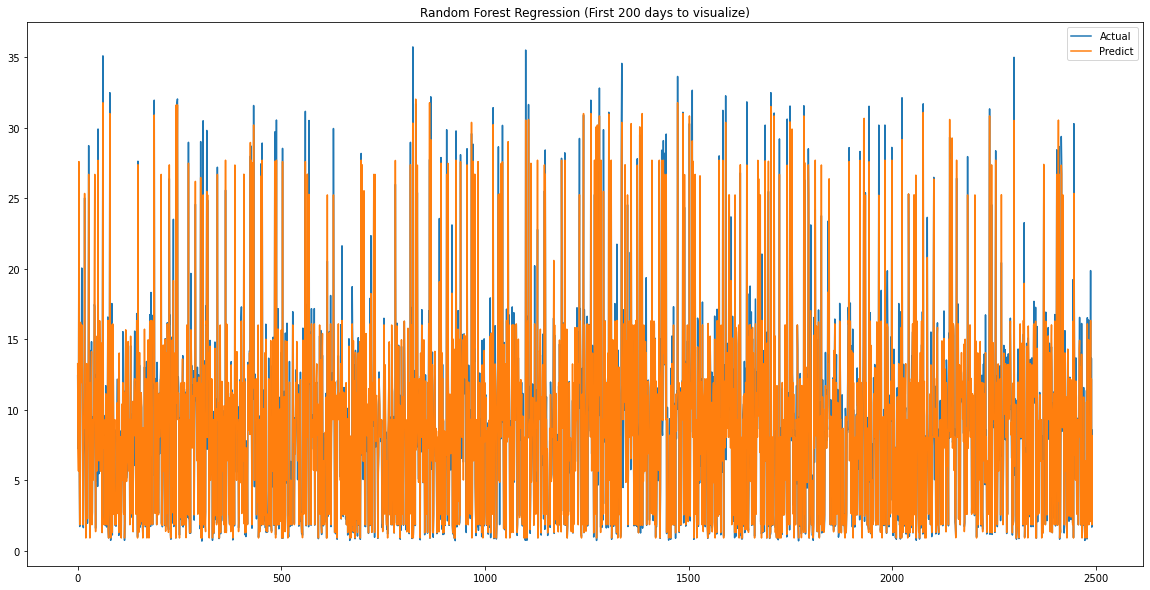

In [378]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train, Y_train)
pred=regr.predict(X_test) #make prediction on test set
score=regr.score(X_test,Y_test)
print("Score:", score)
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(Y_test, pred))
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(Y_test,label='Actual')
ax.plot(pred,label='Predict')
plt.title('Random Forest Regression (First 200 days to visualize)')
ax.legend()

# **LSTM**

In [379]:
training_set=data_train['Mid'].to_numpy().reshape(-1,1)
sc = StandardScaler()#MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
ndays=50
X_train = []
y_train = []
for i in range(ndays, train_end):
    X_train.append(training_set_scaled[i-ndays:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [380]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=60,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=60,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=60,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=60))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=20,batch_size=128)

Epoch 1/20
6/6 [==============================] - 7s 181ms/step - loss: 0.6262
Epoch 2/20
6/6 [==============================] - 1s 182ms/step - loss: 0.2371
Epoch 3/20
6/6 [==============================] - 1s 182ms/step - loss: 0.1706
Epoch 4/20
6/6 [==============================] - 1s 182ms/step - loss: 0.1493
Epoch 5/20
6/6 [==============================] - 1s 182ms/step - loss: 0.0980
Epoch 6/20
6/6 [==============================] - 1s 180ms/step - loss: 0.0875
Epoch 7/20
6/6 [==============================] - 1s 193ms/step - loss: 0.0862
Epoch 8/20
6/6 [==============================] - 1s 186ms/step - loss: 0.0781
Epoch 9/20
6/6 [==============================] - 1s 184ms/step - loss: 0.0900
Epoch 10/20
6/6 [==============================] - 1s 181ms/step - loss: 0.0770
Epoch 11/20
6/6 [==============================] - 1s 183ms/step - loss: 0.0672
Epoch 12/20
6/6 [==============================] - 1s 184ms/step - loss: 0.0652
Epoch 13/20
6/6 [==============================] 